In [1]:
from knowknow import *

from __init__ import births_deaths

db = Dataset('sociology-wos-74b')

loading variable sociology-wos-74b/groups from disk
loading variable sociology-wos-74b/group_reps from disk
loading variable sociology-wos-74b/_attributes from disk


# initial analyses [can skip]

In [2]:
# can I look for bigger ones?
NN = 30

cnt = defaultdict(int)
cits = defaultdict(list)
total = 0
for c in db.items('c'):
    t = db.trend('c', c)
    
    made_it = np.cumsum(t.cits(t.first)) >= NN
    
    if not sum(made_it):
        continue
        raise Exception(c, "never gets %s" % NN)
        
    first_gets_5 = min(i for i in range(len(made_it)) if made_it[i])
    
    cnt[first_gets_5] += 1
    cits[first_gets_5].append( t )
    total += 1

loading variable sociology-wos-74b/ind ___ c from disk
loading variable sociology-wos-74b/ind ___ c.fy from disk
loading variable sociology-wos-74b/ind ___ fy from disk


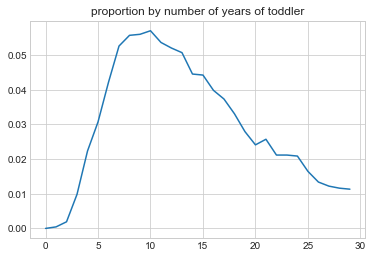

In [3]:
plt.plot(range(30),[cnt[i]/total for i in range(30)])
plt.title("proportion by number of years of toddler");

c:\users\amcga\envs\citation-deaths\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\users\amcga\envs\citation-deaths\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


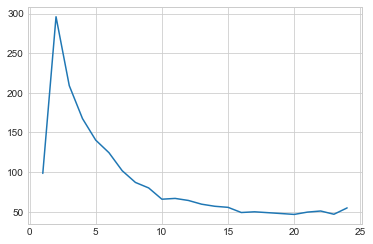

In [4]:
plt.plot([np.mean([x.total for x in cits[i]]) for i in range(25)])

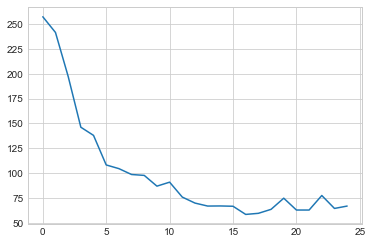

In [5]:
plt.plot([np.quantile([x.total for x in cits[i]], 0.9) for i in range(5,30)])

# toddler years

In [6]:
yyy_count = []

Nc = len(db.items('c'))
for ic, c in enumerate(db.items('c')):
    if (ic+1) % (Nc//50) == 0:
        print("%s/%s"%(ic,Nc))
    
    t = db.trend('c',c)

    if t.data_end-t.first < 20:
        continue

    cs_from_end = np.cumsum(t.cits(t.first)[::-1])

    ys_after_90p = np.argwhere(cs_from_end > cs_from_end[-1]*0.9).flatten()
    first_y_after_90p = np.min(ys_after_90p)
    first_y_after_90p = t.data_end - first_y_after_90p
    YS_BEFORE_10percent = first_y_after_90p - t.first
    prop_BEFORE_10percent = YS_BEFORE_10percent/(t.data_end-t.first)

    yyy_count.append((t,prop_BEFORE_10percent,YS_BEFORE_10percent))

1668/83498
3337/83498
5006/83498
6675/83498
8344/83498
10013/83498
11682/83498
13351/83498
15020/83498
16689/83498
18358/83498
20027/83498
21696/83498
23365/83498
25034/83498
26703/83498
28372/83498
30041/83498
31710/83498
33379/83498
35048/83498
36717/83498
38386/83498
40055/83498
41724/83498
43393/83498
45062/83498
46731/83498
48400/83498
50069/83498
51738/83498
53407/83498
55076/83498
56745/83498
58414/83498
60083/83498
61752/83498
63421/83498
65090/83498
66759/83498
68428/83498
70097/83498
71766/83498
73435/83498
75104/83498
76773/83498
78442/83498
80111/83498
81780/83498
83449/83498


In [7]:
yyy_count[0]

(<knowknow.datastore_cnts.time_trend.TimeTrend at 0x272e544e8c8>, 0.125, 4)

In [8]:
top = [x[0].name for x in sorted(yyy_count, key=lambda x:-x[1])[:3*10*2]]
top = [x[0].name for x in sorted(yyy_count, key=lambda x:-x[1])[:3*10*2] if x[0].total >= 20]

In [9]:
db.trend('c','Parsons, T.|working papers theor').first

1954

In [10]:
from knowknow.datastore_cnts.count_cache import CitedRef

In [11]:
if False:
    import knowknow.datastore_cnts.count_cache
    from importlib import reload
    reload(count_cache)
    from knowknow.datastore_cnts.count_cache import CitedRef

In [12]:

def fmt(x):
    r = CitedRef(x)
    
    if r.type == 'article':
        return "%s (%s)" % (r.author, r.pyear)
    else:
        return "%s %s" % (r.author, r.title.title())

In [13]:
filt = [x for x in yyy_count if x[0].total >= 30 and x[0].first < 2000]

num1 = len([x for x in filt if x[2] >= 5])/len(filt)
num2 = len([x for x in filt if x[2] >= 10])/len(filt)

num3 = max([x[2] for x in filt])

longest = max(filt, key=lambda x:x[2])
lt = longest[0]
lts = lt.name.split("|")
howlong = longest[2]
wholong = "%s (%s)" % (lts[0].split(",")[0], lts[1])
howmuch = lt.total

years_more_than_5, = np.where(
    np.array(lt.cits(lt.first)).cumsum() >= 5
)

howlong5 = lt.first+years_more_than_5.min()

In [14]:
display(Markdown("""
If we limit to cited works that eventually receive at least 30 citations, 
    and whose first citation was before 2000, 
    {num1:0.0%} had their toddler years extend longer than 5 years and
    {num2:0.0%} had their toddler years extend longer than 10 years.
The longest toddler years in this group goes to {wholong} at {howlong} years.
This cited work eventually received {howmuch} citations, and took
    until {howlong5} to get the first 5.
This piece, titled "Memorandum for the Study of Acculturation," is only four pages long, and was published in *American Anthropologist*.
""".format(**locals())))


If we limit to cited works that eventually receive at least 30 citations, 
    and whose first citation was before 2000, 
    32% had their toddler years extend longer than 5 years and
    9% had their toddler years extend longer than 10 years.
The longest toddler years in this group goes to Redfield (1936) at 61 years.
This cited work eventually received 45 citations, and took
    until 2001 to get the first 5.
This piece, titled "Memorandum for the Study of Acculturation," is only four pages long, and was published in *American Anthropologist*.


In [15]:
filt = [x for x in yyy_count if x[0].total >= 30 and x[0].first < 2000]
#filt = [x for x in filt if x[2] > 10]

num1 = len(filt)

filt = [x for x in filt if x[1]>=0.5]
num2 = len(filt)

In [16]:
display(Markdown("""
Of the {num1:,} cited works 
    first cited before 2000 
    which have accumulated 30 citations, 
just {num2:,} were toddlers for at least half of their lives.
""".format(**locals())))


Of the 5,016 cited works 
    first cited before 2000 
    which have accumulated 30 citations, 
just 26 were toddlers for at least half of their lives.


In [55]:
filt = [x for x in yyy_count if x[0].total >= 30 and x[0].first < 2000]

filt = [x for x in filt if x[1]>=0.5]
len(filt)
filt = sorted(filt, key=lambda x:-x[2])

In [56]:
len(filt)

26

In [57]:
print([x[0].name for x in filt])

['Redfield, R.|1936|am anthropol,v38,p149', 'Keynes, J.|gen theory employmen', 'Darwin, C.|expression emotions', 'Dewey, J.|democracy ed', 'Weber, M.|gen ec hist', 'Mays, B.|negros church', 'Dubois, W.|souls black folk', 'Schuetz, A.|1944|am j sociol,v49,p499', 'Taylor, F.|principles sci manag', 'Horton, D.|1956|psychiatr,v19,p215', 'Mead, G.|philos present', 'Blumer, H.|1958|pac sociol rev,v1,p3', 'Verba, S.|participation am pol', 'Fornell, C.|1981|j marketing res,v18,p39', 'Bronfenbrenner, U.|ecology human dev ex', 'Goffman, E.|frame anal essay org', 'Foucault, M.|discipline punish bi', 'Rosenbaum, P.|1983|biometrika,v70,p41', 'Fishbein, M.|understanding attitu', 'Hair, J.|multivariate data an', 'Diener, E.|1985|j pers assess,v49,p71', 'Granovetter, M.|1973|am j sociol,v78,p6', 'Lave, J.|situated learning le', 'Shrum, W.|1988|sociol educ,v61,p227', 'Berry, J.|1980|acculturation theory,p9', 'Dunlap, R.|hdb env sociology']


In [58]:
for t in filt:
    t = t[0].name
    t = t.replace("|"," ")
    t = t.replace(",v"," ")
    t = t.replace(",p"," ")
    t = t.replace(","," ")
    
    t = t.replace("am ","american ")
    t = t.replace("anthr ","anthropolog ")
    t = t.replace("gen ","general ")
    t = t.replace("ed ","education ")
    t = t.replace("psychol ","psychology ")
    t = t.replace("soc ","social ")
    t = t.replace("ec ","economic ")
    t = t.replace("econ ","economy ")
    t = t.replace("hist ","history ")
    t = t.replace("j ","journal ")
    t = t.replace("int ","international ")
    t = t.replace("rev ","review ")
    t = t.replace("polit ","political ")
    
    print(t,'apa','cite')

Redfield  R. 1936 american anthropol 38 149 apa cite
Keynes  J. general theory employmen apa cite
Darwin  C. expression emotions apa cite
Dewey  J. democracy ed apa cite
Weber  M. general economic hist apa cite
Mays  B. negros church apa cite
Dubois  W. souls black folk apa cite
Schuetz  A. 1944 american journal sociol 49 499 apa cite
Taylor  F. principles sci manag apa cite
Horton  D. 1956 psychiatr 19 215 apa cite
Mead  G. philos present apa cite
Blumer  H. 1958 pac sociol review 1 3 apa cite
Verba  S. participation american pol apa cite
Fornell  C. 1981 journal marketing res 18 39 apa cite
Bronfenbrenner  U. ecology human dev ex apa cite
Goffman  E. frame anal essay org apa cite
Foucault  M. discipline punish bi apa cite
Rosenbaum  P. 1983 biometrika 70 41 apa cite
Fishbein  M. understanding attitu apa cite
Hair  J. multivariate data an apa cite
Diener  E. 1985 journal pers assess 49 71 apa cite
Granovetter  M. 1973 american journal sociol 78 6 apa cite
Lave  J. situateducation lear

loading variable sociology-wos-74b/ind ___ c.fy from disk
loading variable sociology-wos-74b/ind ___ fy from disk


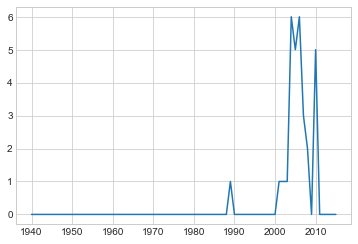

In [56]:
db.trend('c','Granovetter, M.|1973|am j sociol,v78,p6').show()

Berry, J.|1980|acculturation theory,p9
Blumer, H.|1958|pac sociol rev,v1,p3
Bronfenbrenner, U.|ecology human dev ex
Darwin, C.|expression emotions
Dewey, J.|democracy ed
Diener, E.|1985|j pers assess,v49,p71
Saving to 'G:\My Drive\2020 ORGANISATION\1. PROJECTS\qualitative analysis of literature\110 CITATION ANALYSIS\010 analyses\bundle 101 - citation deaths reboot 10-2020\figures'


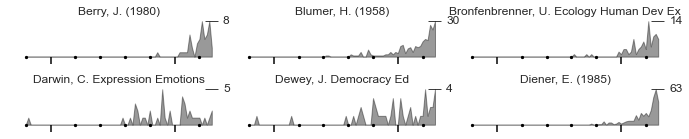

Dubois, W.|souls black folk
Dunlap, R.|hdb env sociology
Fishbein, M.|understanding attitu
Fornell, C.|1981|j marketing res,v18,p39
Foucault, M.|discipline punish bi
Goffman, E.|frame anal essay org
Saving to 'G:\My Drive\2020 ORGANISATION\1. PROJECTS\qualitative analysis of literature\110 CITATION ANALYSIS\010 analyses\bundle 101 - citation deaths reboot 10-2020\figures'


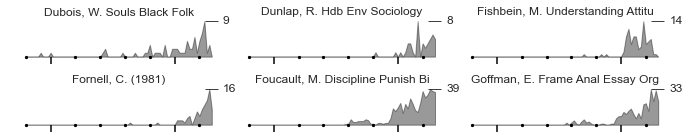

Granovetter, M.|1973|am j sociol,v78,p6
Hair, J.|multivariate data an
Horton, D.|1956|psychiatr,v19,p215
Keynes, J.|gen theory employmen
Lave, J.|situated learning le
Mays, B.|negros church
Saving to 'G:\My Drive\2020 ORGANISATION\1. PROJECTS\qualitative analysis of literature\110 CITATION ANALYSIS\010 analyses\bundle 101 - citation deaths reboot 10-2020\figures'


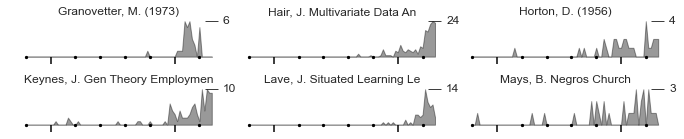

Mead, G.|philos present
Redfield, R.|1936|am anthropol,v38,p149
Rosenbaum, P.|1983|biometrika,v70,p41
Schuetz, A.|1944|am j sociol,v49,p499
Shrum, W.|1988|sociol educ,v61,p227
Taylor, F.|principles sci manag
Saving to 'G:\My Drive\2020 ORGANISATION\1. PROJECTS\qualitative analysis of literature\110 CITATION ANALYSIS\010 analyses\bundle 101 - citation deaths reboot 10-2020\figures'


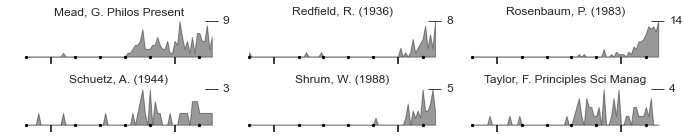

Verba, S.|participation am pol
Weber, M.|gen ec hist
Saving to 'G:\My Drive\2020 ORGANISATION\1. PROJECTS\qualitative analysis of literature\110 CITATION ANALYSIS\010 analyses\bundle 101 - citation deaths reboot 10-2020\figures'


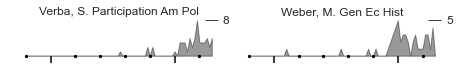

In [65]:
filt = sorted(filt, key=lambda x: x[0].name)

viz.yearly_counts([x[0].name for x in filt], db, myname='top_sleeping',cols=3,print_names=fmt)

In [87]:
top = sorted(yyy_count, key=lambda x:-x[1])[:10]

Harold, G.|studies ethnomethodo 0.9761904761904762


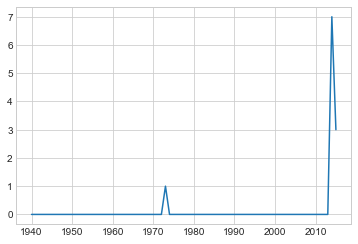

Redfield, R.|1936|am anthropol,v38,p149 0.8133333333333334


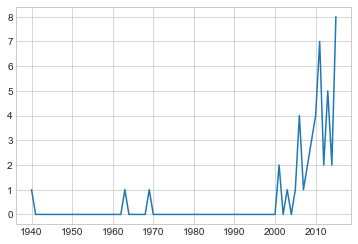

Tobler, W.|1970|econ geogr,v46,p234 0.7948717948717948


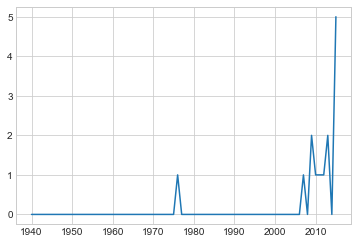

Sobel, M.|1982|sociol methodol,v13,p290 0.7692307692307693


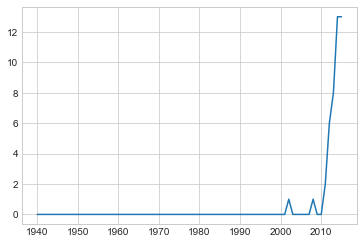

Corbin, J.|basics qualitative r 0.7333333333333333


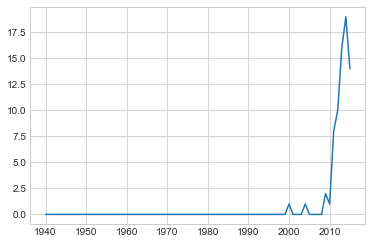

Snow, D.|1988|int social movement,v1,p197 0.7272727272727273


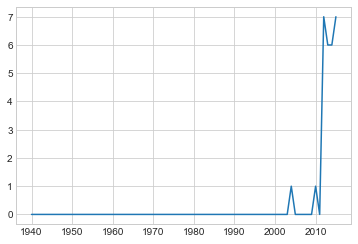

Jarvis, C.|2003|j consum res,v30,p199 0.7


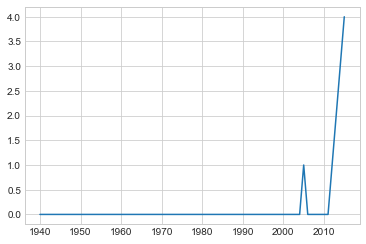

Keynes, J.|gen theory employmen 0.6984126984126984


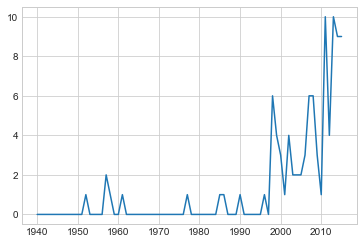

Jordan, B.|birth 4 cultures cro 0.6875


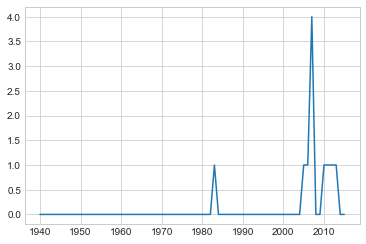

Weber, M.|gen ec hist 0.6833333333333333


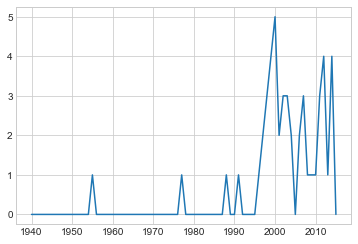

In [88]:
for t,YS in top:
    print(t.name, YS)
    t.show()
    plt.show()

In [92]:
db.search('c','Weber, M.|wirts')

['Weber, M.|wirtschaft gesellsch', 'Weber, M.|wirtschaftsgeschichte']

In [57]:
t = top[0][0]

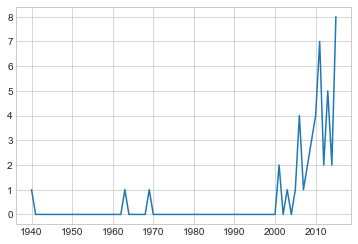

In [59]:
t.show()

In [ ]:
top[0][0].show

In [50]:
max(yyy_count)

61

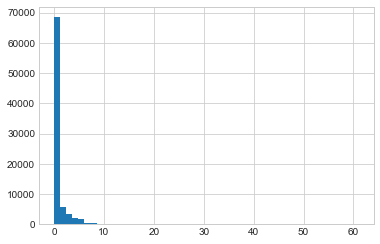

In [49]:
plt.hist(yyy_count, bins=50);

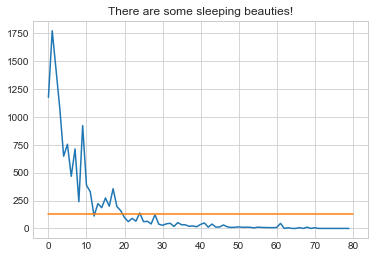

In [25]:
plt.plot([np.max([x.total for x in cits[i]] if len(cits[i]) else 0) for i in range(80)])
plt.plot([0,80],[np.quantile(counts, 0.99),np.quantile(counts, 0.99)])
plt.title('There are some sleeping beauties!');

In [50]:
big_guys = [t for i in range(15,30) for t in cits[i] if t.total >= 25 and t.first >= 1960]

(array([19., 11.,  5.,  7.,  7.,  3.,  2.,  6.,  3.,  4.]),
 array([1960. , 1963.1, 1966.2, 1969.3, 1972.4, 1975.5, 1978.6, 1981.7,
        1984.8, 1987.9, 1991. ]),
 <a list of 10 Patch objects>)

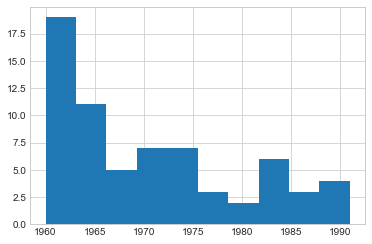

In [51]:
plt.hist([x.first for x in big_guys])

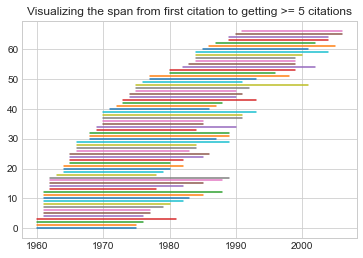

In [52]:
for i, t in enumerate(sorted(big_guys, key=lambda x:x.first)):
    made_it = np.cumsum(t.cits(t.first)) >= 5
    first_gets_5 = min(i for i in range(len(made_it)) if made_it[i])
    t.first_gets_5 = first_gets_5
    
    plt.plot([t.first, t.first+first_gets_5], [i,i]);
plt.title("Visualizing the span from first citation to getting >= 5 citations");

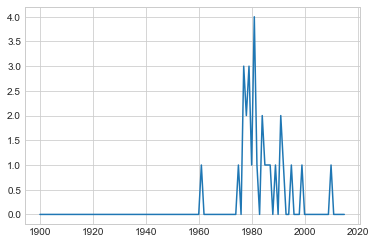

In [53]:
db.trend('c', 'Garfinkel, H.|1949|soc forces,v27,p369').show()

In [54]:
total = sum([1 for i in range(0,30) for t in cits[i] if t.first >= 1960])
total15p = sum([1 for i in range(15,30) for t in cits[i] if t.first >= 1960])
total15p_big = sum([1 for i in range(15,30) for t in cits[i] if t.total >= 25 and t.first >= 1960])

p_first = sum([1 for i in range(0,7) for t in cits[i]]) / sum([len(x) for x in cits.values()])
p10 = sum([1 for i in range(10,max(cits)) for t in cits[i]]) / sum([len(x) for x in cits.values()])
p20 = sum([1 for i in range(20,max(cits)) for t in cits[i]]) / sum([len(x) for x in cits.values()])

n15 = sum([1 for i in range(15,max(cits)) for t in cits[i]])

In [55]:

#Despite the paucity of sleeping beauties, and their relative insignificance on the whole,
#    there are a few outstanding cited works which began their life far after they were first cited.

display(Markdown("""
Although rare, cited works can lie dormant for decades with hardly any citations and suddenly “wake up.” (Ke et al. 2015) 
    Once they do wake up, their citation patterns are as if they had just been published. 
    Ke et al. called these papers “sleeping beauties" (SBs), 
        gave them a rigorous definition, 
        and documented their prevalence in the entirety of Web of Science (they are relatively rare in general). 

There is some evidence in this dataset of the presence of SBs. 
    **Figure 17** shows the distribution of the time it takes after a work is published to receive its first five citations in this dataset. 
    The majority of works achieve this within six years of being published ({p_first:0.1%}),
    but {p10:0.0%} of works receive their fifth citation more than 10 years after their first,
    and {p20:0.0%} of cited works receive their fifth more than 20 years after their first.

Despite these rather remarkable numbers, the great majority of these late-starts never really get started.
That is, they do not achieve much more than five citations in their entire life.
Of the {total:,} cited works which were first cited in 1960 or later {total15p:,} will wait at least 15 years to get their fifth citation.
And of these, only {total15p_big:,} go on to get at least 25 citations total. 
    I present these cases for inspection by the reader.
    These may represent knowledge transfer between fields, where a work which is already highly cited elsewhere is imported into sociology.
    They also occasionally represent misspellings which the grouping algorithm did not catch, as with Grannovetter (1973).
    They may also be works which were globally undiscovered until their surge in this context.
""".format(**locals())))


Although rare, cited works can lie dormant for decades with hardly any citations and suddenly “wake up.” (Ke et al. 2015) 
    Once they do wake up, their citation patterns are as if they had just been published. 
    Ke et al. called these papers “sleeping beauties" (SBs), 
        gave them a rigorous definition, 
        and documented their prevalence in the entirety of Web of Science (they are relatively rare in general). 

There is some evidence in this dataset of the presence of SBs. 
    **Figure 17** shows the distribution of the time it takes after a work is published to receive its first five citations in this dataset. 
    The majority of works achieve this within six years of being published (52.5%),
    but 31% of works receive their fifth citation more than 10 years after their first,
    and 8% of cited works receive their fifth more than 20 years after their first.

Despite these rather remarkable numbers, the great majority of these late-starts never really get started.
That is, they do not achieve much more than five citations in their entire life.
Of the 80,096 cited works which were first cited in 1960 or later 10,313 will wait at least 15 years to get their fifth citation.
And of these, only 67 go on to get at least 25 citations total. 
    I present these cases for inspection by the reader.
    These may represent knowledge transfer between fields, where a work which is already highly cited elsewhere is imported into sociology.
    They also occasionally represent misspellings which the grouping algorithm did not catch, as with Grannovetter (1973).
    They may also be works which were globally undiscovered until their surge in this context.
